In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math as mt
import os

In [5]:
# simulacion estocastica del modelo SIR
def model_SIR_CTMC(N=100, I_0=2, gamma=1, beta=2, t_max=100):
    
    # variables de almacenamiento
    I=[I_0]
    S=[N-I_0]
    R=[0]
    T=[0]
    
    j=0
    
    # proceso
    while t_max>T[-1] and I[-1]!=0 and S[-1]<N:
        y1, y2 = np.random.uniform(0, 1, 2)
        
        # tiempo entre eventos
        T.append(T[j] -mt.log(y1) /(beta*I[j]*S[j]/N + gamma*I[j]))  # interevent time
     
        # infeccion
        if y2 < (beta*I[j]*S[j]/N)/(beta*I[j]*S[j]/N + gamma*I[j]) and S[-1]!=0: 
            S.append(S[j]-1)
            I.append(I[j]+1)
            R.append(N-S[-1]-I[-1])
            
        # recuperacion
        else:
            I.append(I[j]-1)
            S.append(S[j])
            R.append(R[j]+1)
        
        j=j+1
        
    return T,S,I

In [6]:
# solucion numerica por el metodo de Euler del EDO
# del modelo SIR
def EDO_SIR_euler(N=100, I_0=2, gamma=1, beta=2, step=0.1, t_max=100):
    I=[I_0]
    S=[N-I_0]
    R=[0]
    T=[0]
    
    j=0
    
    while t_max>T[-1] and I[-1]>0 :
        S.append(S[j]+step*(-beta/N*S[j]*I[j]))
        I.append(I[j]+step*(beta/N*S[j]*I[j]-gamma*I[j]))
        T.append(T[j]+step)
        j=j+1
    
    return T,S,I

Text(0.5, 1.0, 'SIR')

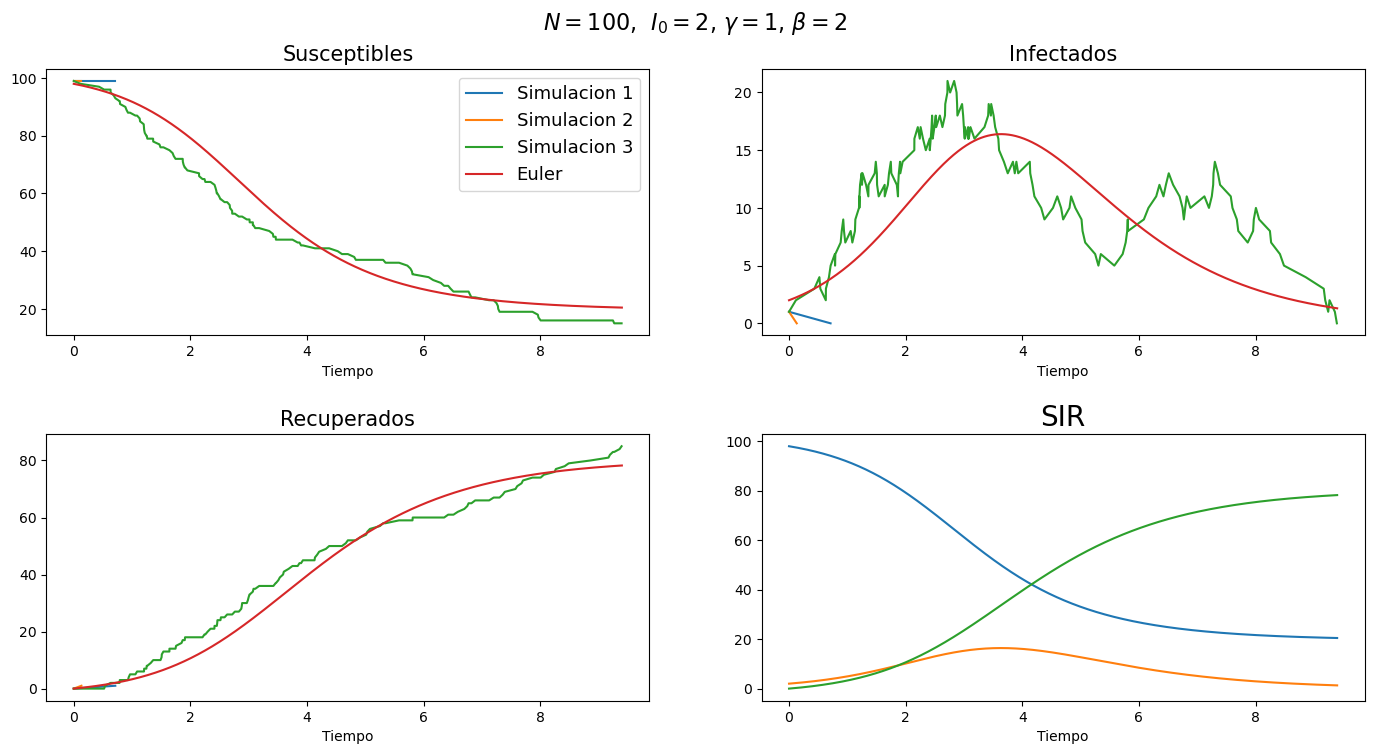

In [7]:
# se realizan 3 simulaciones por el metodo estocastico 
# y se compara con la solucion del EDO
N=100
M=3

max_time=[]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
fig.tight_layout(pad=5.0)
fig.suptitle(r'$N=100$,  $I_0=2$, $\gamma=1$, $\beta=2$', fontsize=16)

# se realizan las simulaciones
for i in range(M):
    T_esto, S_esto, I_esto = model_SIR_CTMC(N=N, I_0=1)  # realiza la simulacion
    axs[0,0].plot(T_esto, S_esto, '-')
    axs[0,0].set_title("Susceptibles", size=15)
    axs[0,0].set_xlabel("Tiempo")
    axs[0,1].plot(T_esto, I_esto, '-')
    axs[0,1].set_title("Infectados", size=15)
    axs[0,1].set_xlabel("Tiempo")
    axs[1,0].plot(T_esto, N-np.array(S_esto)-np.array(I_esto), '-')
    axs[1,0].set_title("Recuperados", size=15)
    axs[1,0].set_xlabel("Tiempo")
    max_time.append(T_esto[-1])


# solucion numerica del EDO
T_edo , S_edo, I_edo  = EDO_SIR_euler(N=N, step=0.01, t_max=max(max_time)) # solucion EDO
axs[0,0].plot(T_edo, S_edo, '-')
axs[0,0].legend(["Simulacion 1", "Simulacion 2","Simulacion 3","Euler"], fontsize=13)
axs[0,1].plot(T_edo, I_edo, '-')
axs[1,0].plot(T_edo, N-np.array(S_edo)-np.array(I_edo), '-')
axs[1,0].set_xlabel("Tiempo")
axs[1,1].plot(T_edo, S_edo, T_edo, I_edo,T_edo, N-np.array(S_edo)-np.array(I_edo))
axs[1,1].set_xlabel("Tiempo")
axs[1,1].set_title("SIR", size=20)